In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
/kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
/kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip
/kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip
/kaggle/input/mercari-price-suggestion-challenge/sample_submission.csv.7z
/kaggle/input/train-df-preprocessed/train_df_processed.csv


In [13]:
train_df = pd.read_csv('/kaggle/input/train_df_processed.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/train_df_processed.csv'

In [4]:
train_df

NameError: name 'train_df' is not defined

In [2]:
import matplotlib.pyplot as plt

# 카테고리 1 빈도 시각화
category_1_counts = train_df['category_1'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_1_counts, labels=category_1_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Category 1')
plt.axis('equal')  # 원형 차트를 원형으로 유지
plt.show()

NameError: name 'train_df' is not defined

In [ ]:
# 카테고리 2 빈도 시각화
category_2_counts = train_df['category_2'].value_counts()
category_2_counts

plt.figure(figsize=(8, 8))
plt.pie(category_2_counts, labels=category_2_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Category 2')
plt.axis('equal')
plt.show()

In [ ]:
# 카테고리 3 빈도 시각화
category_3_counts = train_df['category_3'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_3_counts, labels=category_3_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Category 3')
plt.axis('equal')
plt.show()

Top 5 Category 1 by Average Price:
category_1
beauty         19.720270
electronics    36.181489
handmade       18.276211
home           24.664486
kids           20.831515
Name: price, dtype: float64

Top 5 Category 2 by Average Price:
category_2
accessories    19.217744
antique        25.040827
apparel        16.489916
art            14.538079
artwork        14.281654
Name: price, dtype: float64

Top 5 Category 3 by Average Price:
category_3
100 years or older    37.718519
50 to 75 years        29.686047
75 to 100 years       60.829268
above knee mini       22.070785
accessories           18.306437
Name: price, dtype: float64


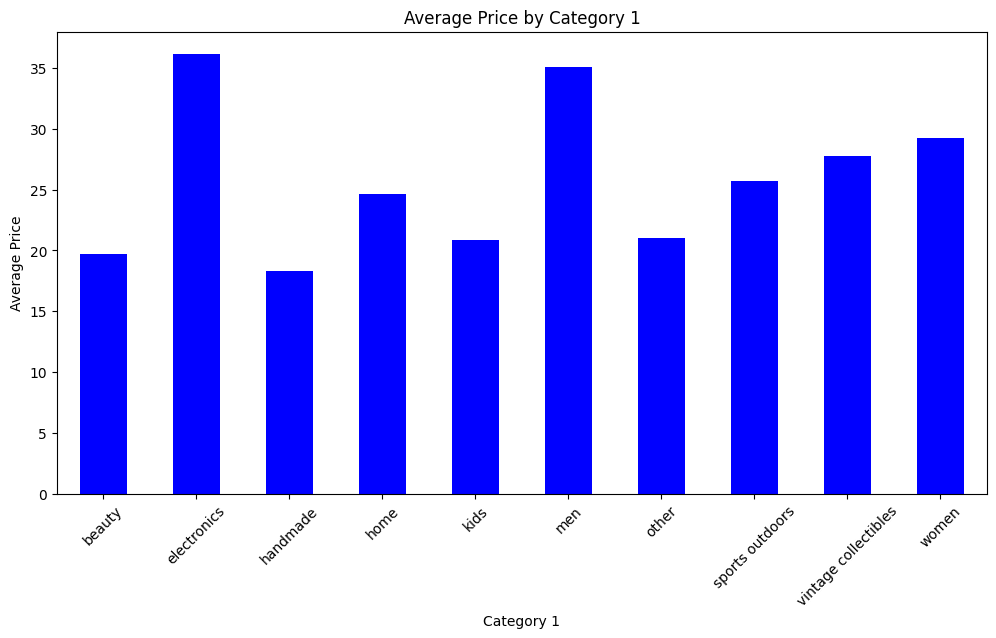

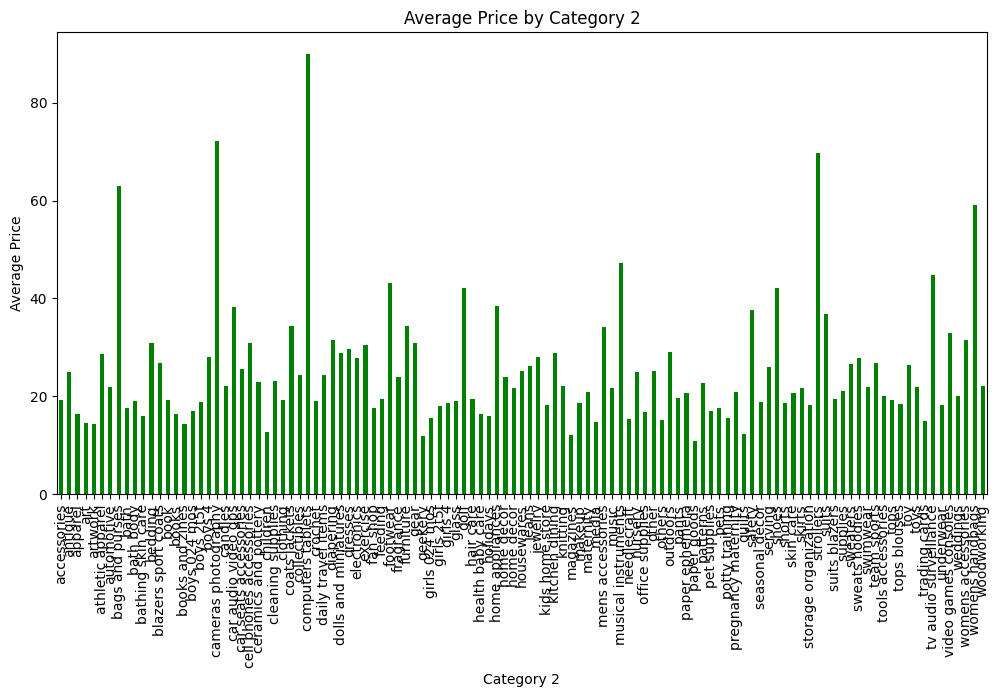

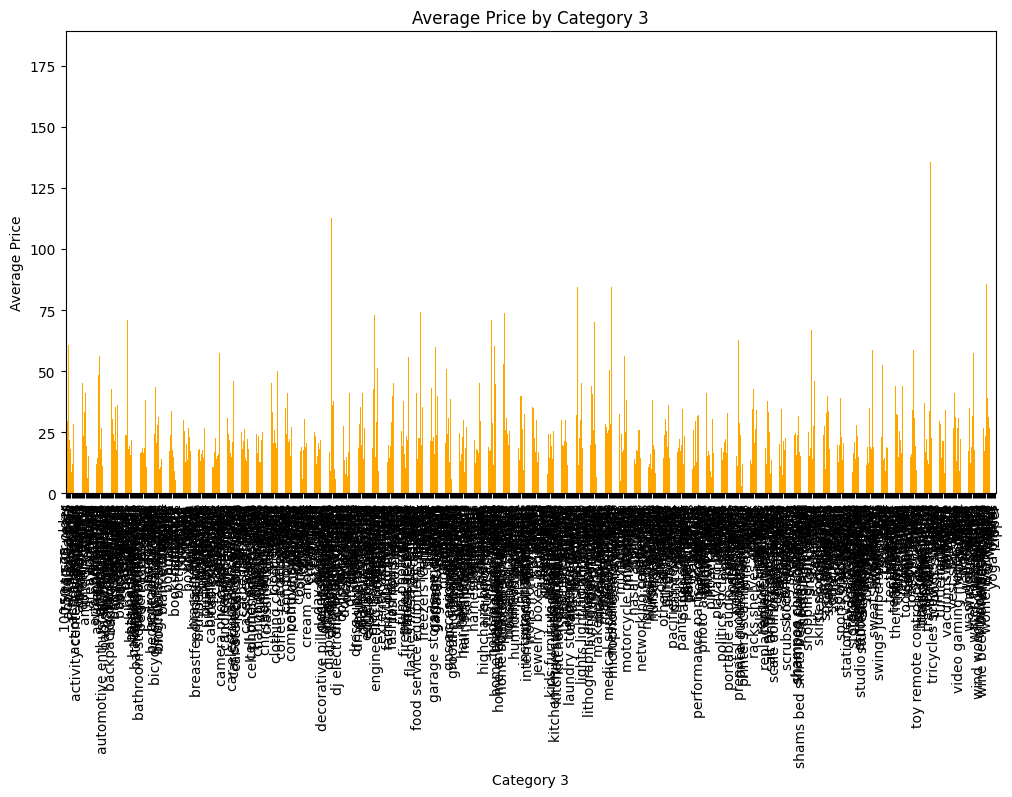

In [37]:
# 카테고리별 평균 가격 계산
category_1_avg_price = train_df.groupby('category_1')['price'].mean()
category_2_avg_price = train_df.groupby('category_2')['price'].mean()
category_3_avg_price = train_df.groupby('category_3')['price'].mean()

# 상위 5개 값 출력
print("Top 5 Category 1 by Average Price:")
print(category_1_avg_price.head())

print("\nTop 5 Category 2 by Average Price:")
print(category_2_avg_price.head())

print("\nTop 5 Category 3 by Average Price:")
print(category_3_avg_price.head())

# 시각화 - 막대 그래프

# 카테고리 1 평균 가격 시각화
plt.figure(figsize=(12, 6))
category_1_avg_price.plot(kind='bar', color='blue')
plt.title('Average Price by Category 1')
plt.xlabel('Category 1')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# 카테고리 2 평균 가격 시각화
plt.figure(figsize=(12, 6))
category_2_avg_price.plot(kind='bar', color='green')
plt.title('Average Price by Category 2')
plt.xlabel('Category 2')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

# 카테고리 3 평균 가격 시각화
plt.figure(figsize=(12, 6))
category_3_avg_price.plot(kind='bar', color='orange')
plt.title('Average Price by Category 3')
plt.xlabel('Category 3')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [26]:
category_counts = train_df['category_name'].value_counts()

top_30_categories = category_counts.head(30)

print("Top 30 categories by frequency:")
print(top_30_categories)

Top 30 categories by frequency:
category_name
Women/Athletic Apparel/Pants, Tights, Leggings                 57384
Women/Tops & Blouses/T-Shirts                                  42319
Beauty/Makeup/Face                                             33245
Beauty/Makeup/Lips                                             28676
Beauty/Makeup/Eyes                                             24378
Electronics/Video Games & Consoles/Games                       24094
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    23259
Women/Underwear/Bras                                           20447
Women/Dresses/Above Knee, Mini                                 18874
Women/Tops & Blouses/Blouse                                    18759
Women/Tops & Blouses/Tank, Cami                                18685
Women/Jewelry/Necklaces                                        18622
Beauty/Makeup/Makeup Palettes                                  18416
Women/Shoes/Boots                                        

In [27]:
# item_description 길이 계산
train_df['description_length'] = train_df['item_description'].astype(str).apply(len)

# 상관관계 분석을 위해 필요한 열만 추출
relevant_df = train_df[['description_length', 'item_condition_id', 'price']]

# 상관관계 분석
correlation_matrix = relevant_df.corr()
print(correlation_matrix)

                    description_length  item_condition_id     price
description_length            1.000000          -0.131743  0.045284
item_condition_id            -0.131743           1.000000  0.001738
price                         0.045284           0.001738  1.000000


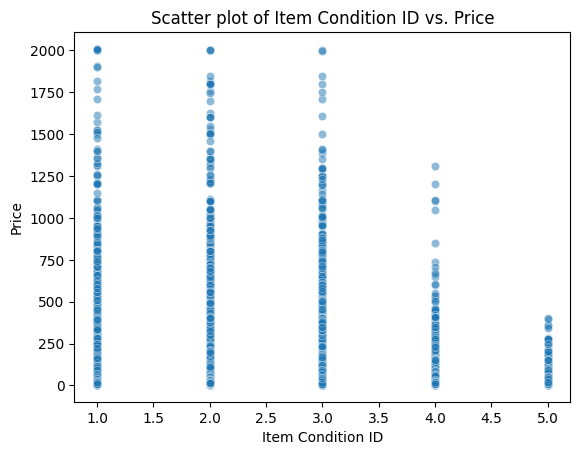

item_condition_id
1.0    26.651096
2.0    28.040941
3.0    26.921493
4.0    24.716218
5.0    32.304096
Name: price, dtype: float64


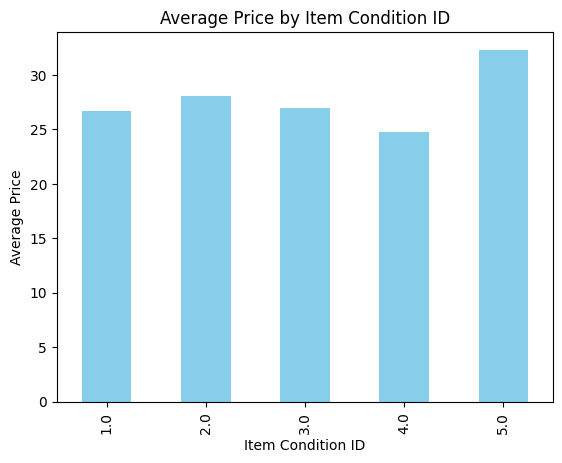

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# item_condition_id와 price 간의 상관관계 분석
sns.scatterplot(data=train_df, x='item_condition_id', y='price', alpha=0.5)
plt.title('Scatter plot of Item Condition ID vs. Price')
plt.xlabel('Item Condition ID')
plt.ylabel('Price')
plt.show()

# item_condition_id별 평균 가격 계산
avg_price_by_condition = train_df.groupby('item_condition_id')['price'].mean()
print(avg_price_by_condition)

# item_condition_id별 평균 가격 막대 그래프
avg_price_by_condition.plot(kind='bar', color='skyblue')
plt.title('Average Price by Item Condition ID')
plt.xlabel('Item Condition ID')
plt.ylabel('Average Price')
plt.show()

In [29]:
print("Correlation between description length and item condition ID:")
print(correlation_matrix.loc['description_length', 'item_condition_id'])

print("Correlation between item condition ID and price:")
print(correlation_matrix.loc['item_condition_id', 'price'])

print("Correlation between description length and price:")
print(correlation_matrix.loc['description_length', 'price'])

Correlation between description length and item condition ID:
-0.13174344443895275
Correlation between item condition ID and price:
0.001738016068590601
Correlation between description length and price:
0.045284259477074124


- 약한 음의 상관관계를 나타냅니다. 이는 item_description의 길이가 길수록 item_condition_id가 낮아지는 경향이 있음을 의미 / 상관계수의 절대값이 0.1 정도로 낮기 때문에, 이 관계는 매우 약한 것
-  거의 상관관계가 없음을 나타냅니다. 이는 item_condition_id와 price 간에 특별한 관계가 없음을 의미 / item_condition_id가 가격에 미치는 영향은 거의 없다
-  매우 약한 양의 상관관계를 나타냅니다. 이는 item_description의 길이가 길수록 price가 약간 증가하는 경향이 있음을 의미하지만, 상관계수의 절대값이 0.05 정도로 매우 낮기 때문에, 이 관계 역시 매우 약함

In [30]:
import pandas as pd

# 키워드 리스트
keywords = ["brand new", "never opened", "with tag", "new in box"]

# 키워드 중 하나라도 포함된 행을 필터링
keyword_pattern = '|'.join(keywords)
filtered_items_df = train_df[train_df['combined_text'].str.contains(keyword_pattern, case=False, na=False)]

# # 필터링된 데이터의 일부를 데이터 프레임 형태로 출력
filtered_items_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3,combined_text,description_length
2,3.0,leather horse statues,1.0,Home/Home Décor/Home Décor Accents,unknown,35.0,1.0,new with tags leather horses retail for rm eac...,home,home décor,home décor accents,leather horse statues new with tags leather ho...,164
13,15.0,sephora tarte birthday gift,1.0,Beauty/Makeup/Makeup Sets,tarte,11.0,1.0,brand new deluxe travel size products contains...,beauty,makeup,makeup sets,sephora tarte birthday gift brand new deluxe t...,139
15,17.0,new baby ktan active baby carrier,1.0,Kids/Gear/Backpacks & Carriers,unknown,29.0,1.0,brand new in box size medium color coral retai...,kids,gear,backpacks carriers,new baby ktan active baby carrier brand new in...,401
16,18.0,too faced limited merry macaroons,1.0,Beauty/Makeup/Makeup Palettes,too faced,25.0,1.0,this authentic pallete by too faced is brand n...,beauty,makeup,makeup palettes,too faced limited merry macaroons this authent...,297
21,23.0,triple car charger,1.0,Electronics/Cell Phones & Accessories/Chargers...,unknown,8.0,1.0,brand new never used all colors are available ...,electronics,cell phones accessories,chargers cradles,triple car charger brand new never used all co...,58


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


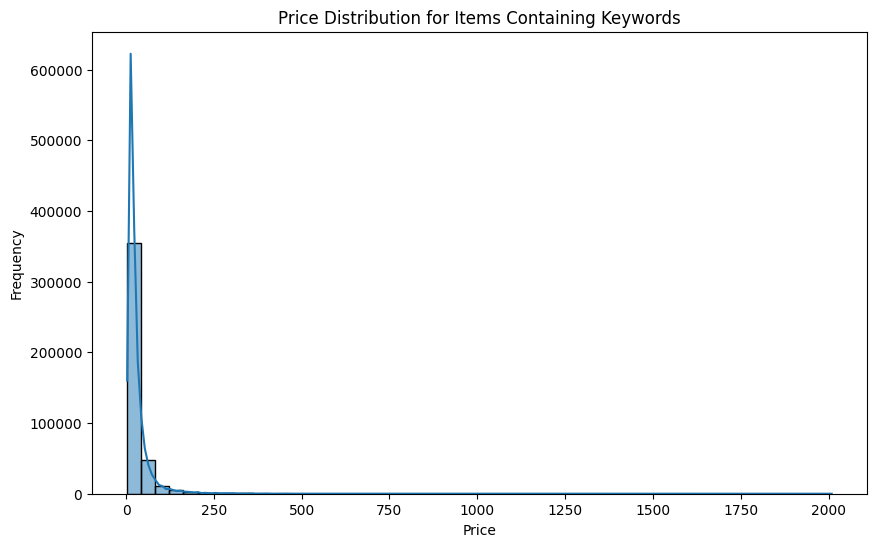

Correlation between price and items containing "brand new": 0.0307
Correlation between price and items containing "never opened": 0.0008
Correlation between price and items containing "with tag": 0.0351
Correlation between price and items containing "new in box": 0.0222
Correlation between price and items containing "in great condition": 0.0180
Correlation between price and items containing "certificate of authenticity": 0.0075
Correlation between price and items containing "complete set": 0.0061
Correlation between price and items containing "worn once": -0.0002
Correlation between price and items containing "great condition": 0.0191
Correlation between price and items containing "no stains": -0.0049
Correlation between price and items containing "like new": 0.0318
Correlation between item_condition_id and items containing "brand new": -0.3641
Correlation between item_condition_id and items containing "never opened": -0.0840
Correlation between item_condition_id and items containing "

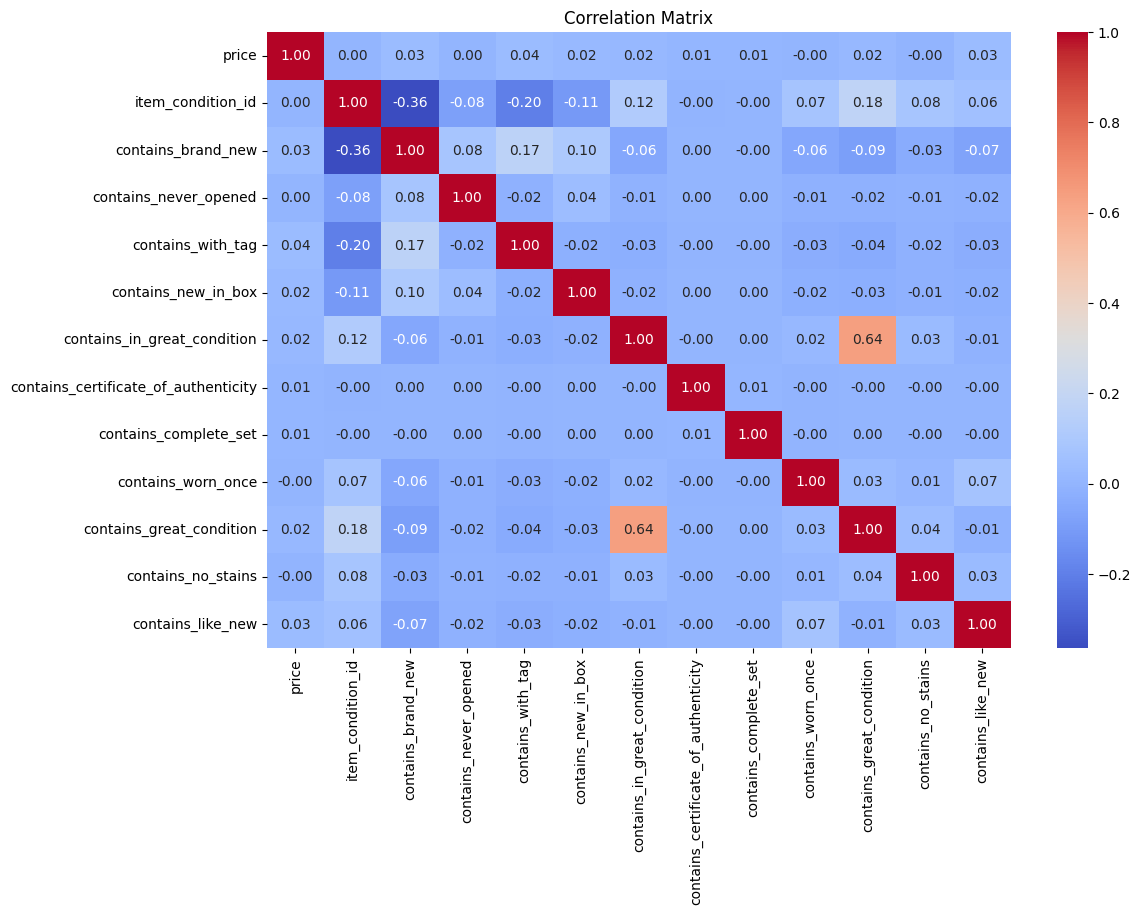

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 특정 단어가 포함된 항목 필터링 함수
def filter_by_keywords(df, keywords):
    keyword_pattern = '|'.join(keywords)
    return df[df['combined_text'].str.contains(keyword_pattern, case=False, na=False)]

# 특정 단어 포함 여부를 나타내는 열 추가
def add_keywords_flag(df, keywords):
    for keyword in keywords:
        df[f'contains_{keyword.replace(" ", "_")}'] = df['combined_text'].str.contains(keyword, case=False, na=False).astype(int)

# 특정 단어에 따른 가격 분포 시각화
def plot_price_distribution(df, keywords):
    keyword_pattern = '|'.join(keywords)
    filtered_df = df[df['combined_text'].str.contains(keyword_pattern, case=False, na=False)]
    plt.figure(figsize=(10, 6))
    sns.histplot(filtered_df['price'], bins=50, kde=True)
    plt.title(f'Price Distribution for Items Containing Keywords')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

# 특정 단어 포함 여부와 가격 상관관계 계산
def calculate_keywords_price_correlation(df, keywords):
    add_keywords_flag(df, keywords)
    for keyword in keywords:
        keyword_flag = f'contains_{keyword.replace(" ", "_")}'
        correlation = df[keyword_flag].corr(df['price'])
        print(f'Correlation between price and items containing "{keyword}": {correlation:.4f}')

# 특정 단어 포함 여부와 item_condition_id 상관관계 계산
def calculate_keywords_condition_correlation(df, keywords):
    add_keywords_flag(df, keywords)
    for keyword in keywords:
        keyword_flag = f'contains_{keyword.replace(" ", "_")}'
        correlation = df[keyword_flag].corr(df['item_condition_id'])
        print(f'Correlation between item_condition_id and items containing "{keyword}": {correlation:.4f}')

# 데이터프레임 로드
# train_df = pd.read_csv('train.tsv', sep='\t') # 이미 로드되었다고 가정

# 특정 단어 리스트
keywords = [
    'brand new',
    'never opened',
    'with tag',
    'new in box',
    'in great condition',
    'certificate of authenticity',
    'complete set',
    'worn once',
    'great condition',
    'no stains',
    'like new'
]

# 'combined_text' 열이 포함된 데이터프레임 가정
# 'combined_text' 열은 제목과 설명을 결합한 열입니다. 실제로는 'title'과 'description' 열을 결합해야 합니다.
# 예시로 결합하는 방법:
# train_df['combined_text'] = train_df['title'].fillna('') + ' ' + train_df['description'].fillna('')

# 특정 단어 포함 여부에 따른 가격 분포 시각화 및 상관관계 분석
plot_price_distribution(train_df, keywords)
calculate_keywords_price_correlation(train_df, keywords)
calculate_keywords_condition_correlation(train_df, keywords)

# 상관관계 히트맵 시각화
add_keywords_flag(train_df, keywords)
correlation_matrix = train_df[['price', 'item_condition_id'] + [f'contains_{kw.replace(" ", "_")}' for kw in keywords]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### 가격과 상관관계
- with tag 0.0351 : 가격과 약간의 양의 상관관계, 태그가 있는 제품이 일반적으로 조금 더 높은 가격을 가질 수 있음
- like new 0.0318, brand new 0.0307 : 가격과 약간의 양의 상관관계, 새 제품이 조금 더 높은 가격을 가질 수 있음
- new in box 0.0222, in great condition 0.0180, great condition 0.0191 : 가격과 약간의 상관관계, 좋은 상태의 제품이 조금 더 높은 가격을 가질 수 있음
- worn once -0.0002 : 가격과 거의 상관관계 없음
- no strains -0.0049 : 가격과 약간의 음의 상관관계 있음
### item condition과 상관관계
- brand new -0.3641 : 상태가 좋을수록 brand new 키워드가 더 많이 나타남
- with tag -0.2021, new in box -0.1134, never opend -0.0840 : 상태가 좋을수록 이 키워드들이 많이 나타남
- in great condition -.1189, great condition 0.1788, no stain 0.0834, worn once 0.0741 : 상태 코드가 높을수록 (더 많이 사용된 상태일수록) 이 키워드들이 더 많이 나타남을 시사 - 상대적으로?
- certificate of authenticity -0.0030, complete set - 0.0001 : 상태와 거의 상관관계 없음
### 최종 결과 해석
가격에 대한 영향
- 대부분의 키워드는 가격과 매우 약한 상관관계를 가짐. 이는 특정 키워드가 가격에 큰 영향을 미치지 않을 수 있음을 나타냄. 예를 들어, "with tag"와 "brand new" 같은 키워드는 약간 더 높은 가격을 가질 가능성이 있지만, 그 영향은 미미합.

item condition에 대한 영향
- "brand new", "with tag", "new in box" 등과 같은 키워드는 상태가 더 좋은 (낮은 상태 코드) 아이템과 관련이 있음. 반대로, "in great condition", "great condition", "no stains" 같은 키워드는 상태 코드가 높을수록 (더 많이 사용된 상태) 나타나는 경향이 있음.
- 이런 결과는 특정 키워드가 제품의 상태를 나타내는 데 어느 정도 유용할 수 있음을 의미

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


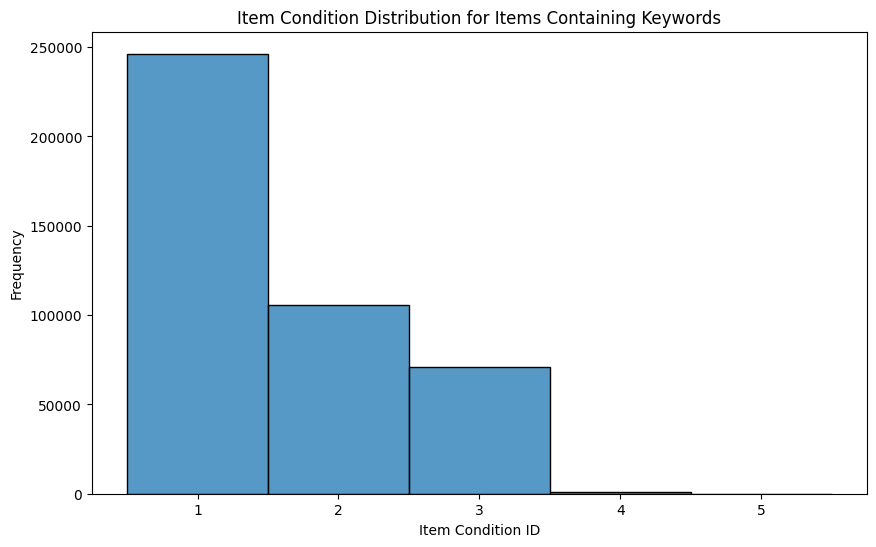

Correlation between item_condition_id and items containing "brand new": -0.3641
Correlation between item_condition_id and items containing "never opened": -0.0840
Correlation between item_condition_id and items containing "with tag": -0.2021
Correlation between item_condition_id and items containing "new in box": -0.1134
Correlation between item_condition_id and items containing "in great condition": 0.1189
Correlation between item_condition_id and items containing "certificate of authenticity": -0.0030
Correlation between item_condition_id and items containing "complete set": -0.0001
Correlation between item_condition_id and items containing "worn once": 0.0741
Correlation between item_condition_id and items containing "great condition": 0.1788
Correlation between item_condition_id and items containing "no stains": 0.0834
Correlation between item_condition_id and items containing "like new": 0.0557
Correlation between price and items containing "brand new": 0.0307
Correlation between 

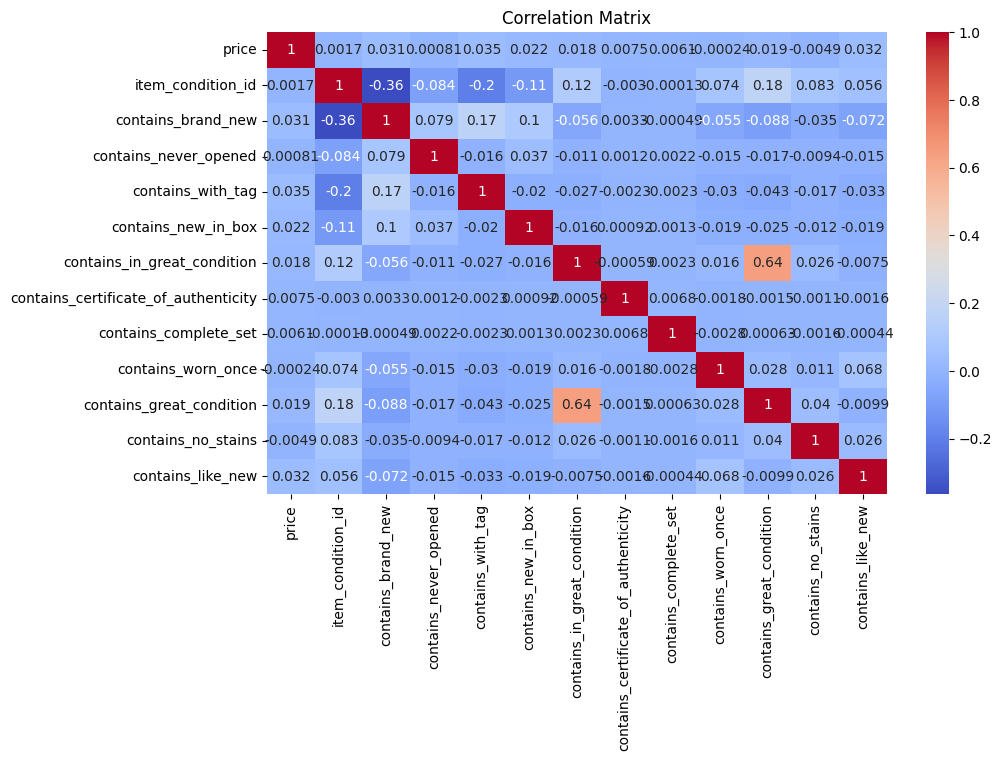

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 특정 단어가 포함된 항목 필터링 함수
def filter_by_keywords(df, keywords):
    keyword_pattern = '|'.join(keywords)
    return df[df['combined_text'].str.contains(keyword_pattern, case=False, na=False)]

# 특정 단어 포함 여부를 나타내는 열 추가
def add_keywords_flag(df, keywords):
    for keyword in keywords:
        df[f'contains_{keyword.replace(" ", "_")}'] = df['combined_text'].str.contains(keyword, case=False, na=False).astype(int)

# 특정 단어에 따른 item_condition_id 분포 시각화
def plot_condition_distribution(df, keywords):
    keyword_pattern = '|'.join(keywords)
    filtered_df = df[df['combined_text'].str.contains(keyword_pattern, case=False, na=False)]
    plt.figure(figsize=(10, 6))
    sns.histplot(filtered_df['item_condition_id'], bins=5, kde=False, discrete=True)
    plt.title(f'Item Condition Distribution for Items Containing Keywords')
    plt.xlabel('Item Condition ID')
    plt.ylabel('Frequency')
    plt.show()

# 특정 단어 포함 여부와 item_condition_id 상관관계 계산
def calculate_keywords_condition_correlation(df, keywords):
    add_keywords_flag(df, keywords)
    for keyword in keywords:
        keyword_flag = f'contains_{keyword.replace(" ", "_")}'
        correlation = df[keyword_flag].corr(df['item_condition_id'])
        print(f'Correlation between item_condition_id and items containing "{keyword}": {correlation:.4f}')

# 특정 단어 포함 여부와 price 상관관계 계산
def calculate_keywords_price_correlation(df, keywords):
    add_keywords_flag(df, keywords)
    for keyword in keywords:
        keyword_flag = f'contains_{keyword.replace(" ", "_")}'
        correlation = df[keyword_flag].corr(df['price'])
        print(f'Correlation between price and items containing "{keyword}": {correlation:.4f}')

# 특정 단어 리스트
keywords = [
    'brand new',
    'never opened',
    'with tag',
    'new in box',
    'in great condition',
    'certificate of authenticity',
    'complete set',
    'worn once',
    'great condition',
    'no stains',
    'like new'
]

# 특정 단어 포함 여부에 따른 item_condition_id 분포 시각화
plot_condition_distribution(train_df, keywords)

# 특정 단어 포함 여부와 item_condition_id 상관관계 계산
calculate_keywords_condition_correlation(train_df, keywords)

# 특정 단어 포함 여부와 price 상관관계 계산
calculate_keywords_price_correlation(train_df, keywords)

# 상관관계 히트맵 시각화
add_keywords_flag(train_df, keywords)
correlation_matrix = train_df[['price', 'item_condition_id'] + [f'contains_{kw.replace(" ", "_")}' for kw in keywords]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Correlation between item_condition_id and price: 0.0017

Mean price by item_condition_id:
   item_condition_id      price
0                1.0  26.651096
1                2.0  28.040941
2                3.0  26.921493
3                4.0  24.716218
4                5.0  32.304096


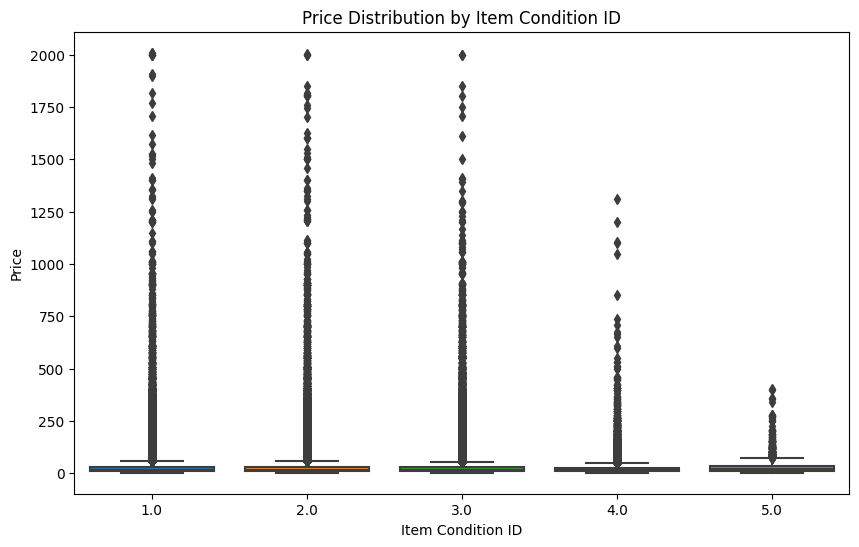

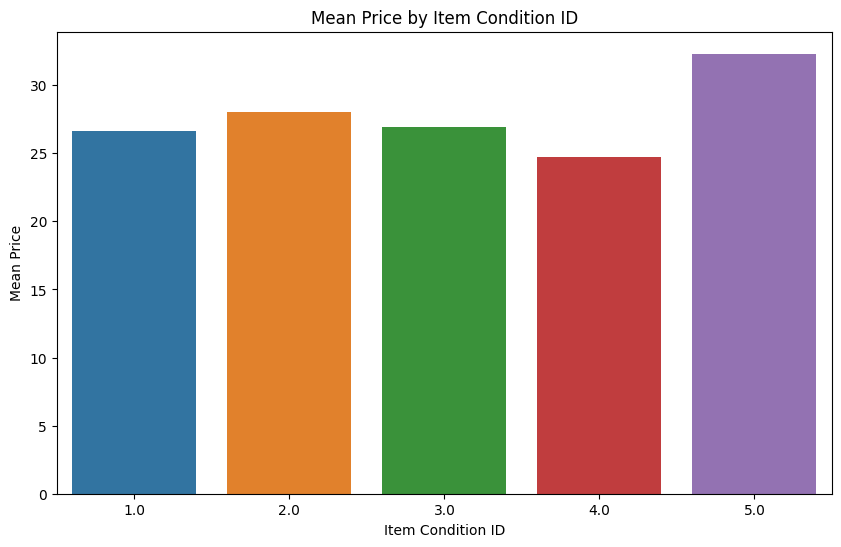

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 로드
# train_df = pd.read_csv('train.tsv', sep='\t') # 이미 로드되었다고 가정

# item_condition_id와 price 간의 상관관계 계산
correlation = train_df['item_condition_id'].corr(train_df['price'])
print(f'Correlation between item_condition_id and price: {correlation:.4f}')

# item_condition_id에 따른 price의 평균 계산
condition_price_mean = train_df.groupby('item_condition_id')['price'].mean().reset_index()
print("\nMean price by item_condition_id:")
print(condition_price_mean)

# item_condition_id에 따른 price 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='item_condition_id', y='price', data=train_df)
plt.title('Price Distribution by Item Condition ID')
plt.xlabel('Item Condition ID')
plt.ylabel('Price')
plt.show()

# item_condition_id에 따른 price의 평균 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='item_condition_id', y='price', data=condition_price_mean)
plt.title('Mean Price by Item Condition ID')
plt.xlabel('Item Condition ID')
plt.ylabel('Mean Price')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


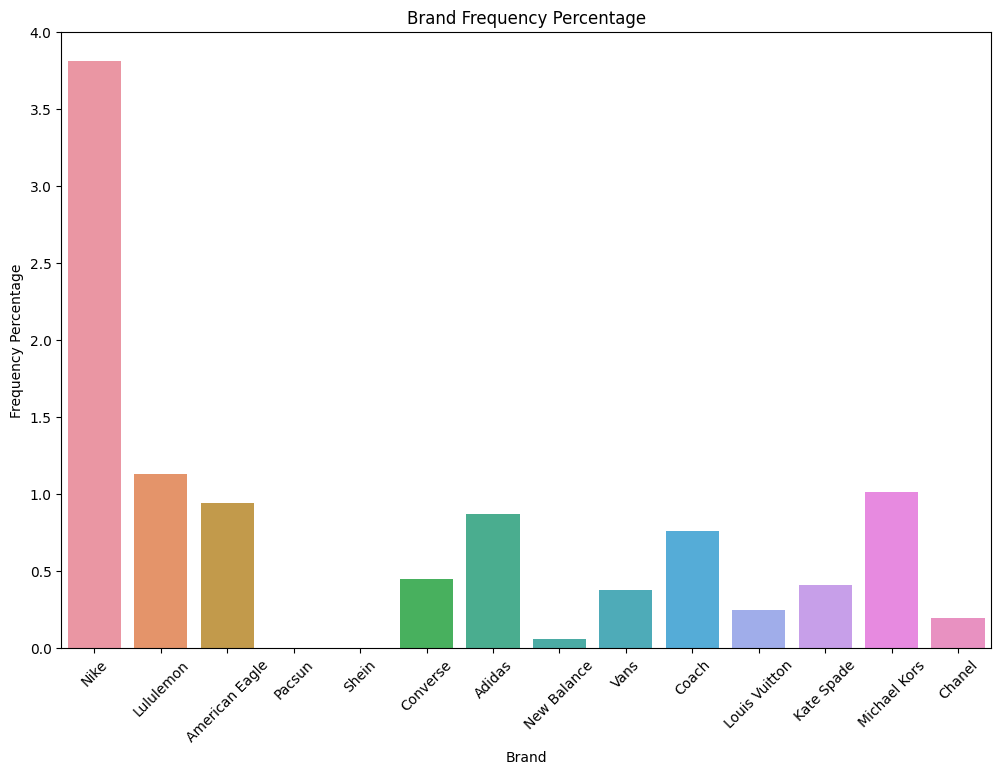

Brand Frequencies (Percentage):
Nike: 3.81%
Lululemon: 1.13%
American Eagle: 0.94%
Pacsun: 0.00%
Shein: 0.00%
Converse: 0.45%
Adidas: 0.87%
New Balance: 0.06%
Vans: 0.37%
Coach: 0.76%
Louis Vuitton: 0.24%
Kate Spade: 0.41%
Michael Kors: 1.01%
Chanel: 0.20%


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


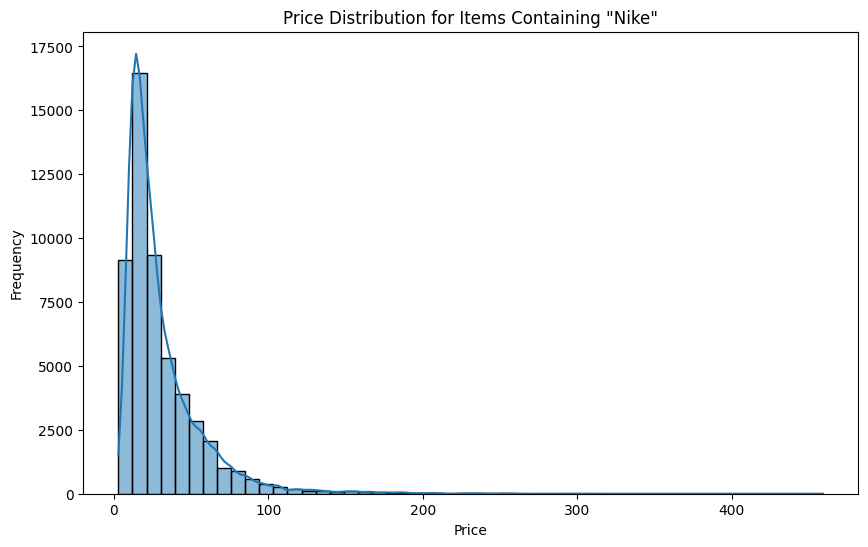

Correlation between price and items containing "Nike": 0.0195
Correlation between item_condition_id and items containing "Nike": 0.0867


/tmp/ipykernel_33/3218903306.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Average sentiment score for items containing "Nike": 0.3104


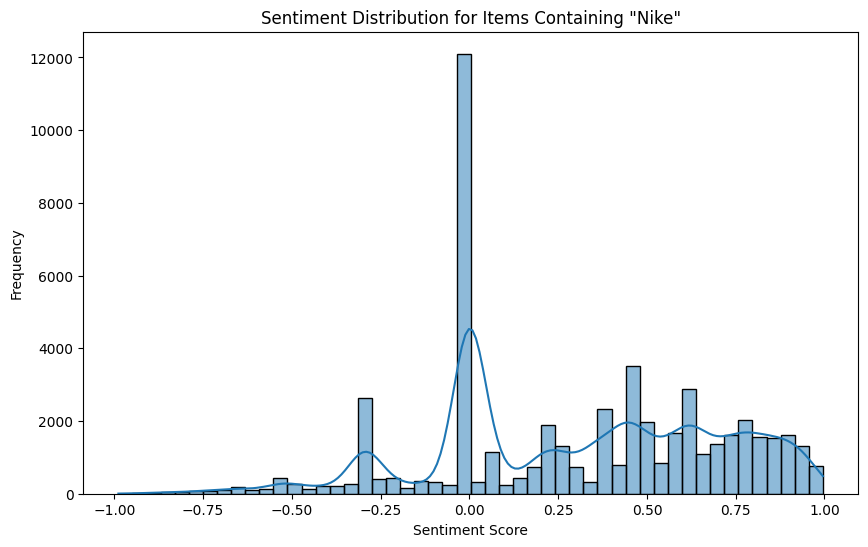

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


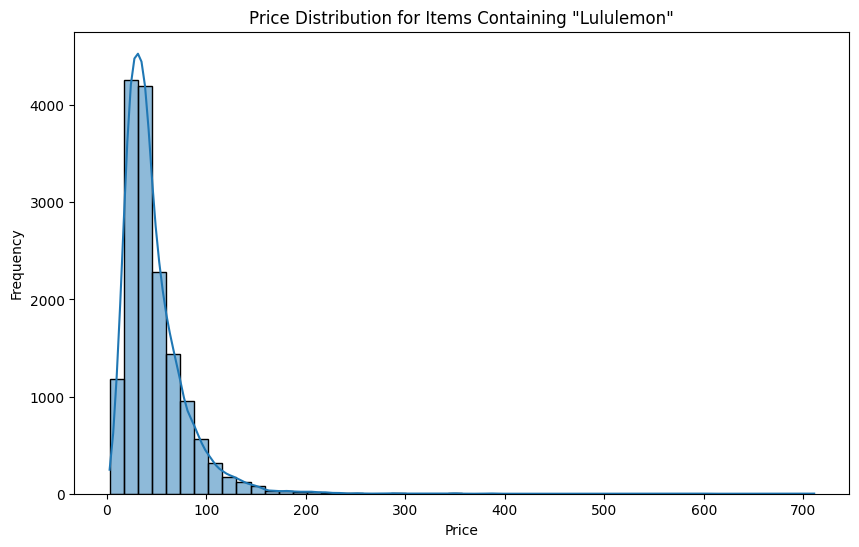

Correlation between price and items containing "Lululemon": 0.0541
Correlation between item_condition_id and items containing "Lululemon": 0.0475


/tmp/ipykernel_33/3218903306.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Average sentiment score for items containing "Lululemon": 0.3602


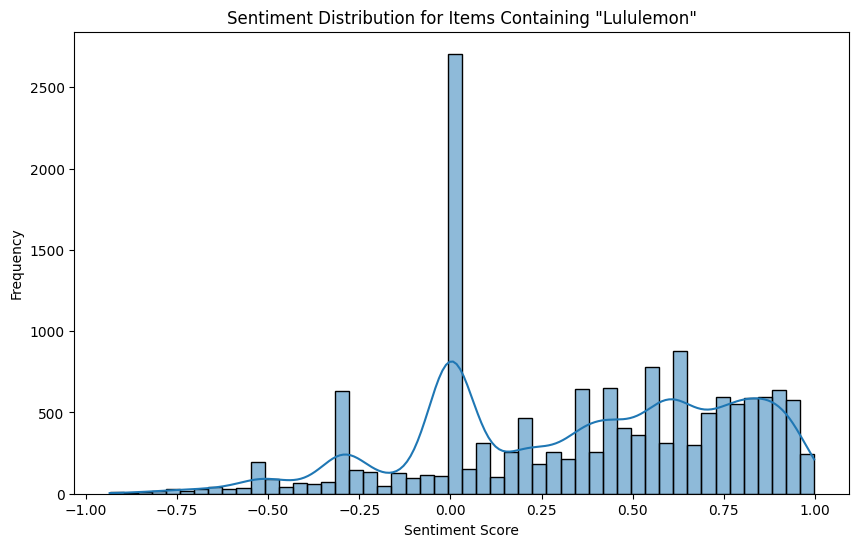

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


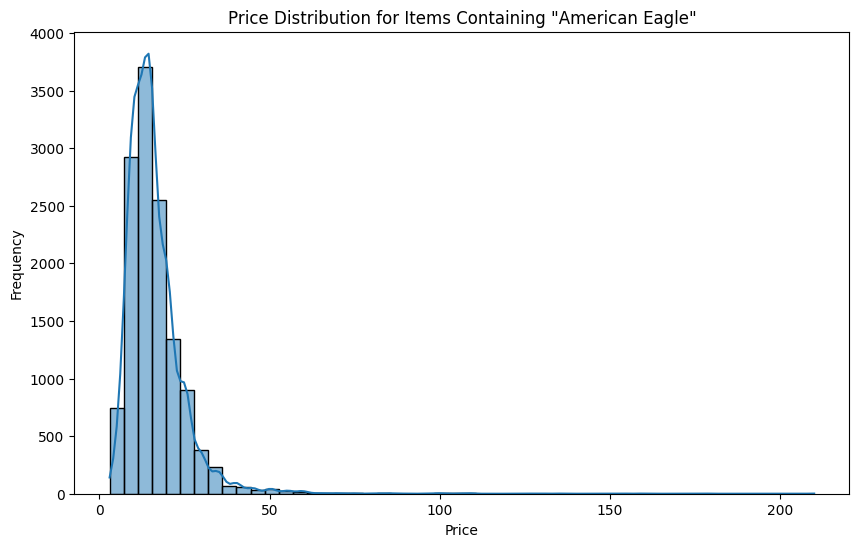

Correlation between price and items containing "American Eagle": -0.0271
Correlation between item_condition_id and items containing "American Eagle": 0.0536


/tmp/ipykernel_33/3218903306.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Average sentiment score for items containing "American Eagle": 0.3386


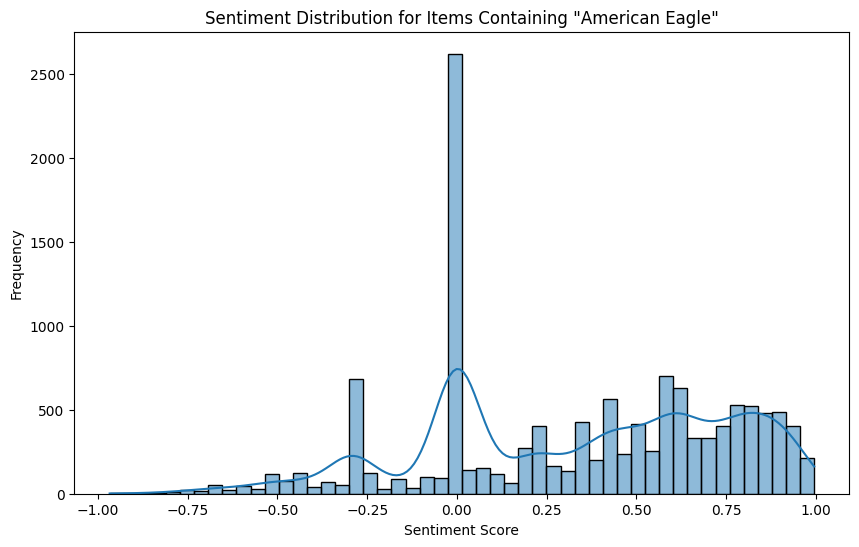

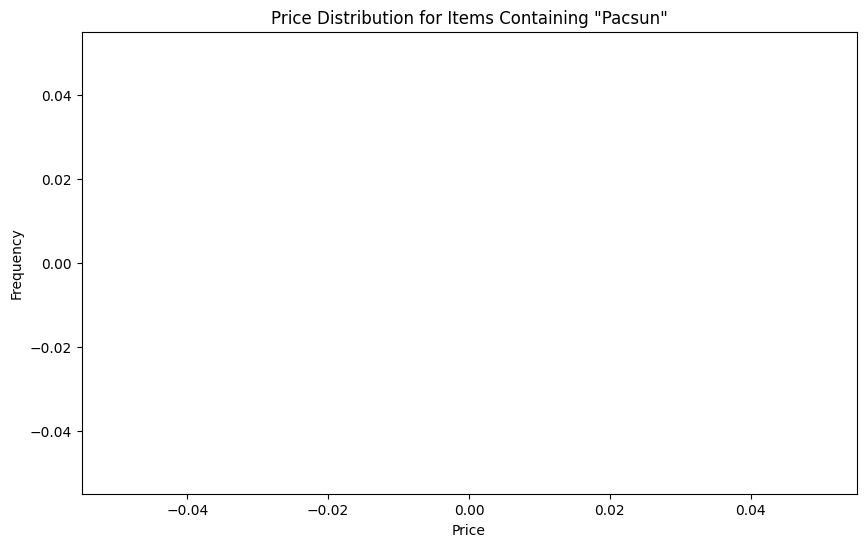

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between price and items containing "Pacsun": nan


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between item_condition_id and items containing "Pacsun": nan
Average sentiment score for items containing "Pacsun": nan


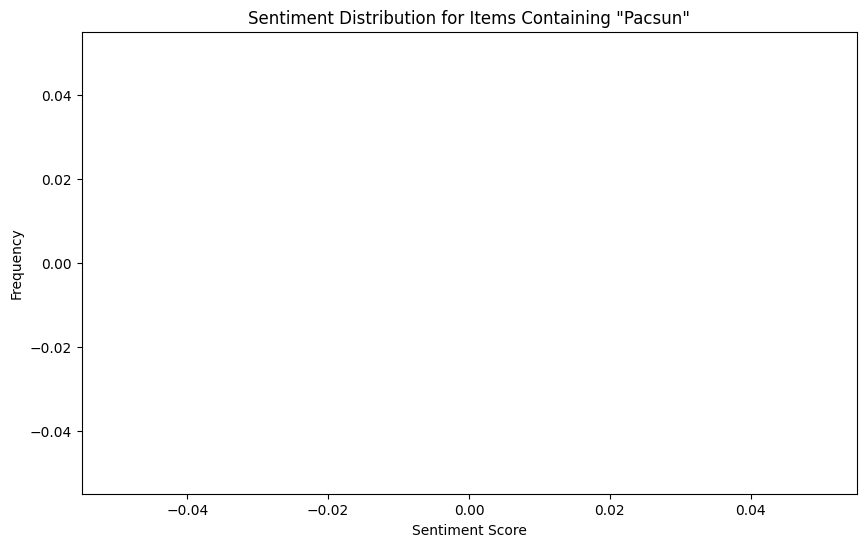

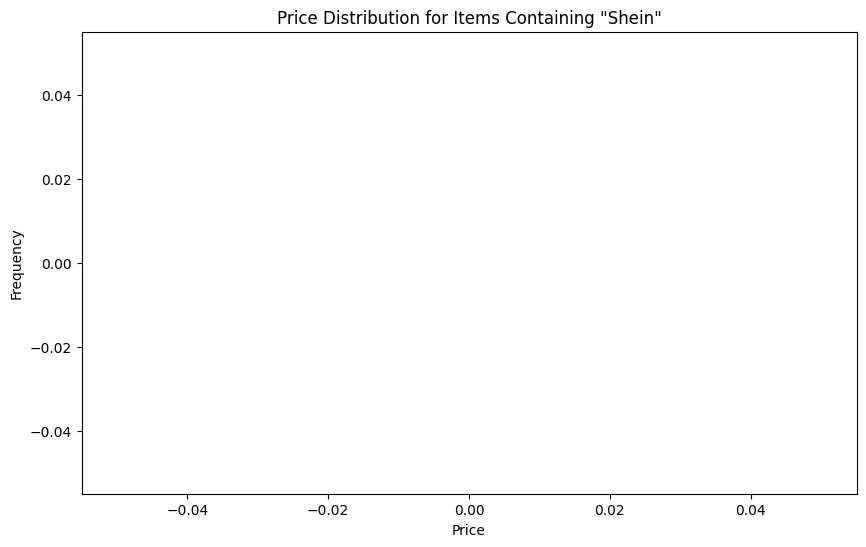

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between price and items containing "Shein": nan


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between item_condition_id and items containing "Shein": nan
Average sentiment score for items containing "Shein": nan


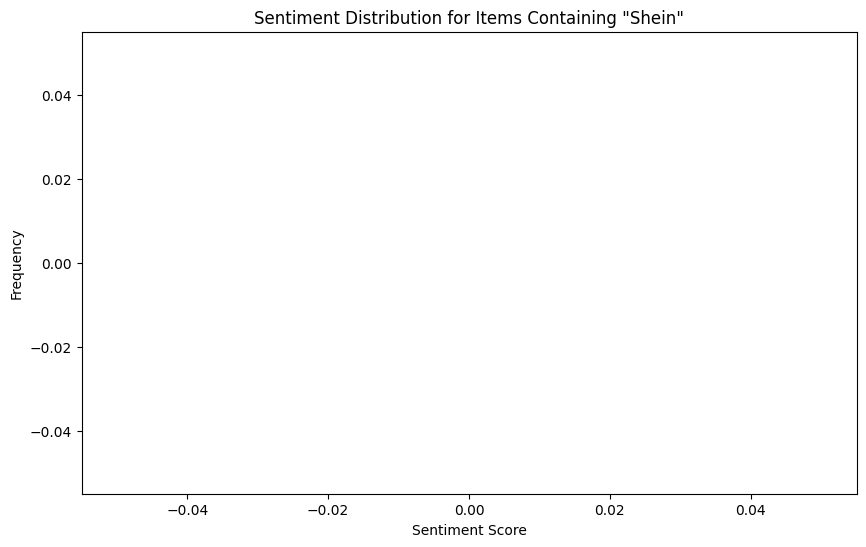

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


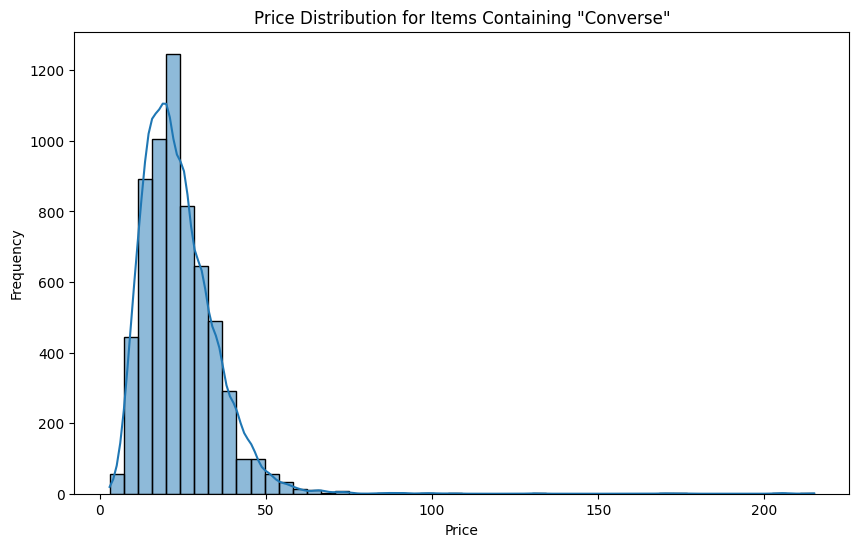

Correlation between price and items containing "Converse": -0.0054
Correlation between item_condition_id and items containing "Converse": 0.0476


/tmp/ipykernel_33/3218903306.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])


Average sentiment score for items containing "Converse": 0.3126


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


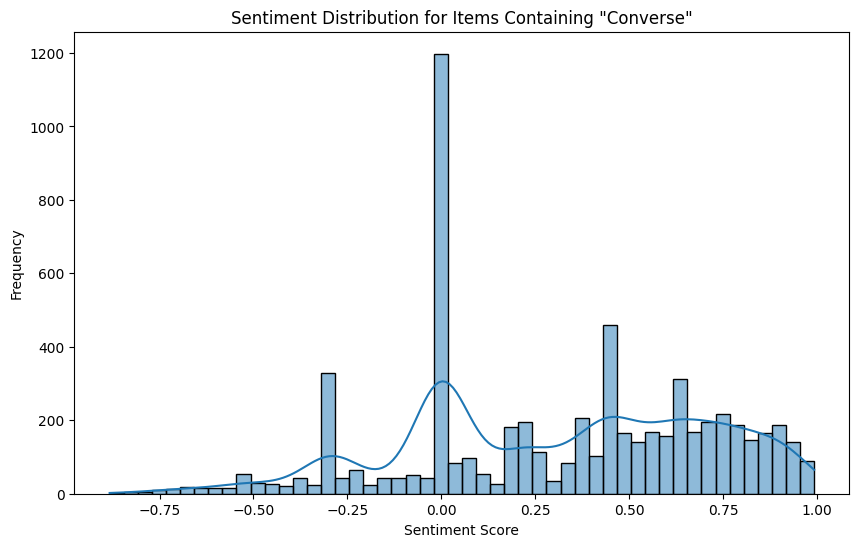

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


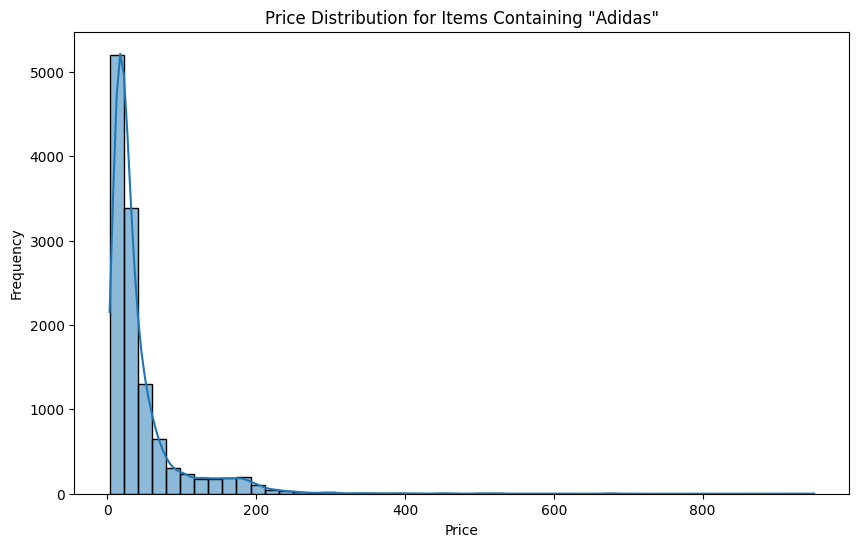

Correlation between price and items containing "Adidas": 0.0383
Correlation between item_condition_id and items containing "Adidas": 0.0250


/tmp/ipykernel_33/3218903306.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Average sentiment score for items containing "Adidas": 0.2973


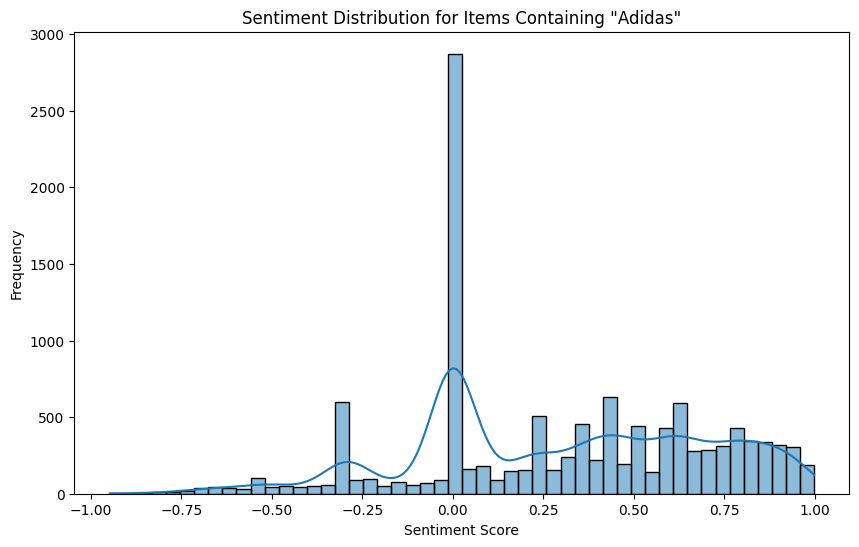

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


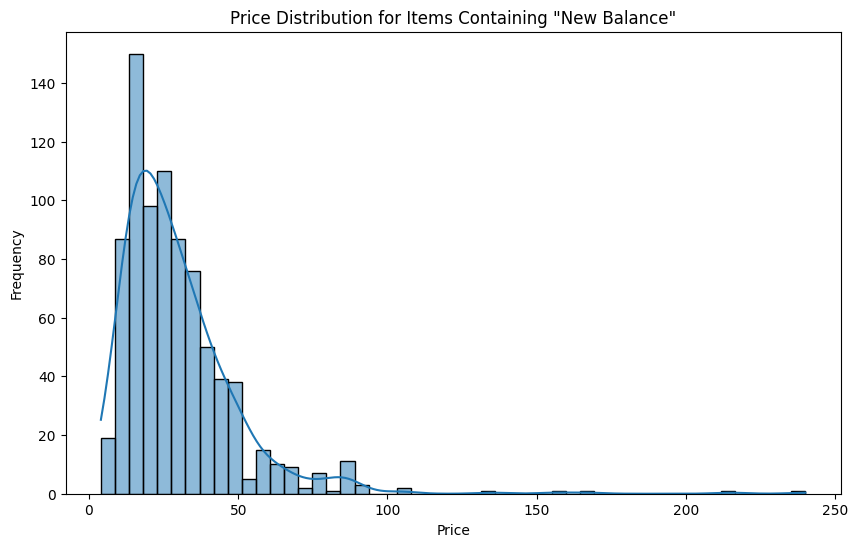

Correlation between price and items containing "New Balance": 0.0018
Correlation between item_condition_id and items containing "New Balance": 0.0112


/tmp/ipykernel_33/3218903306.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Average sentiment score for items containing "New Balance": 0.3539


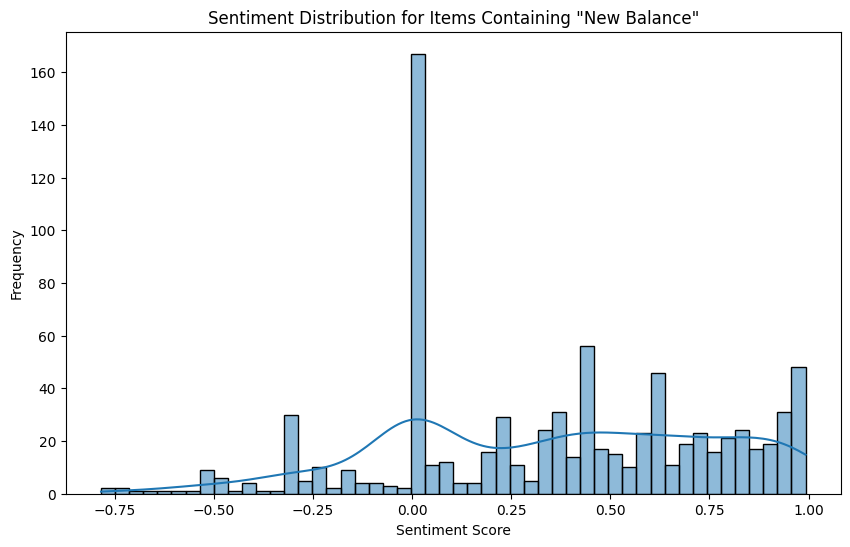

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


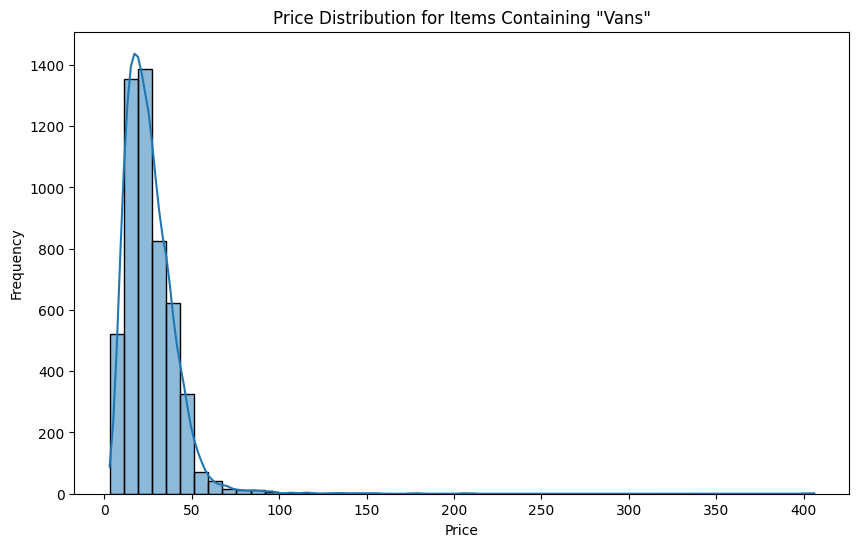

Correlation between price and items containing "Vans": -0.0017
Correlation between item_condition_id and items containing "Vans": 0.0316


/tmp/ipykernel_33/3218903306.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Average sentiment score for items containing "Vans": 0.2688


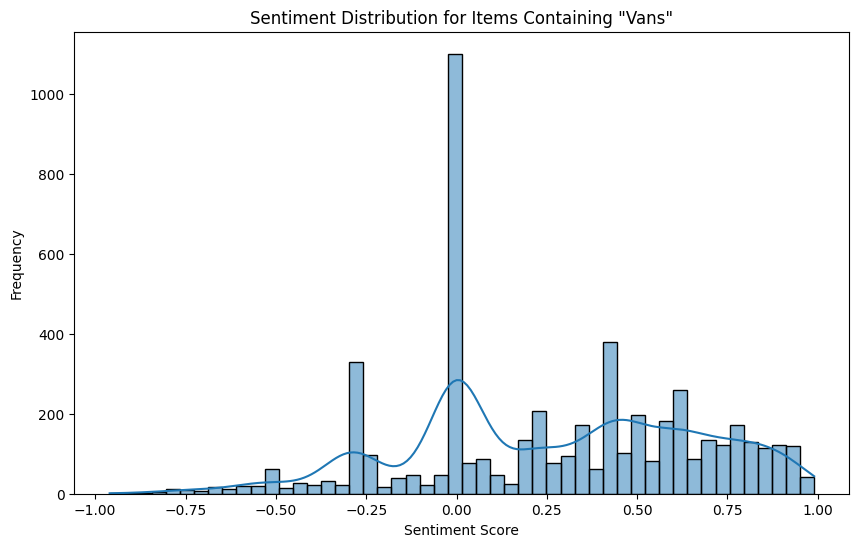

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


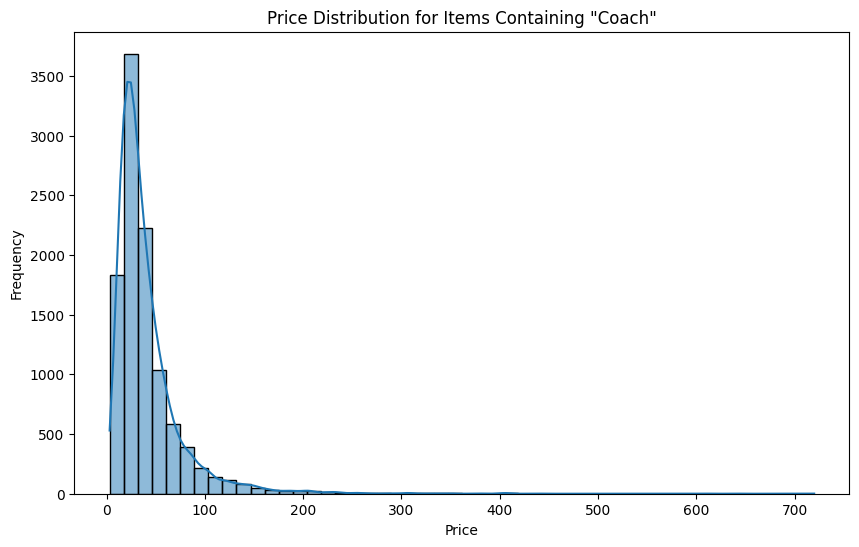

Correlation between price and items containing "Coach": 0.0314
Correlation between item_condition_id and items containing "Coach": 0.0569


/tmp/ipykernel_33/3218903306.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Average sentiment score for items containing "Coach": 0.3840


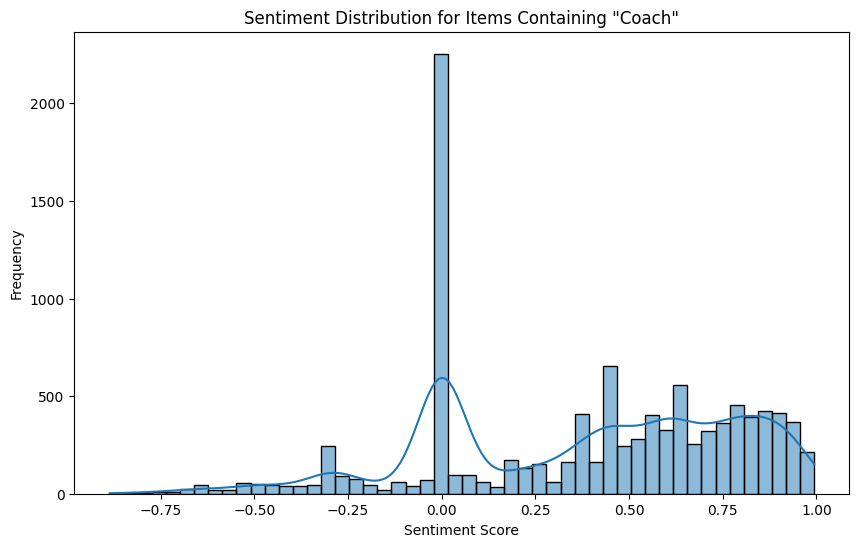

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


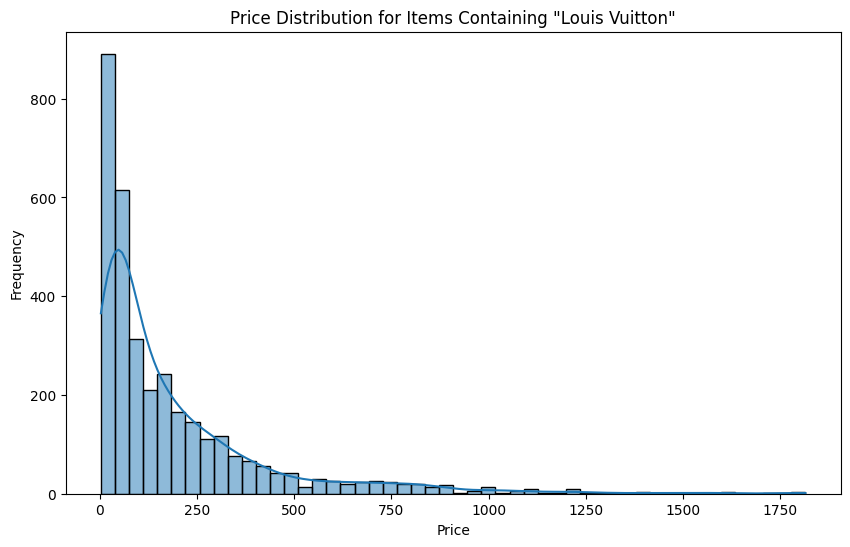

Correlation between price and items containing "Louis Vuitton": 0.2085
Correlation between item_condition_id and items containing "Louis Vuitton": 0.0303


/tmp/ipykernel_33/3218903306.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Average sentiment score for items containing "Louis Vuitton": 0.3809


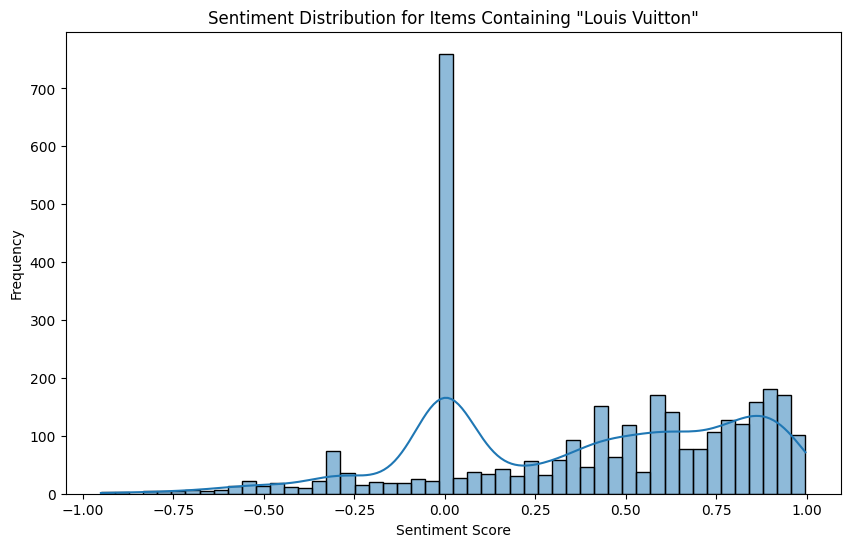

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


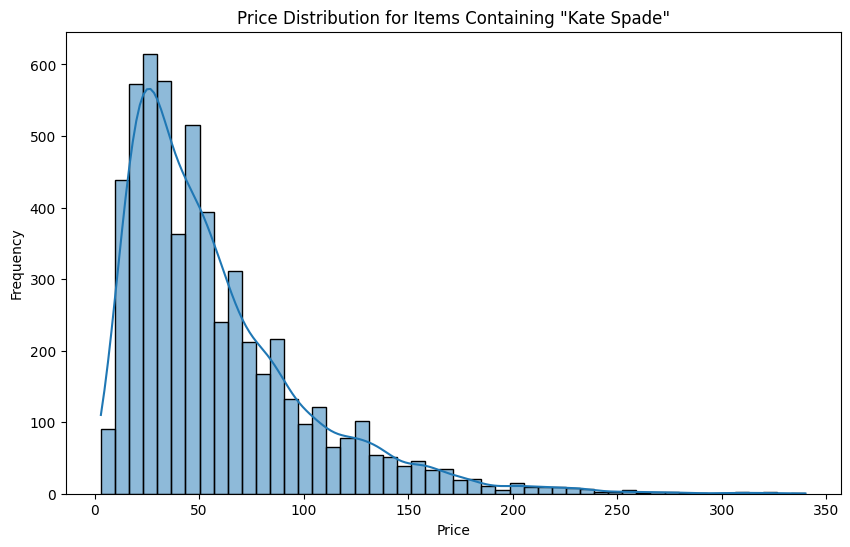

Correlation between price and items containing "Kate Spade": 0.0501
Correlation between item_condition_id and items containing "Kate Spade": -0.0045


/tmp/ipykernel_33/3218903306.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Average sentiment score for items containing "Kate Spade": 0.3675


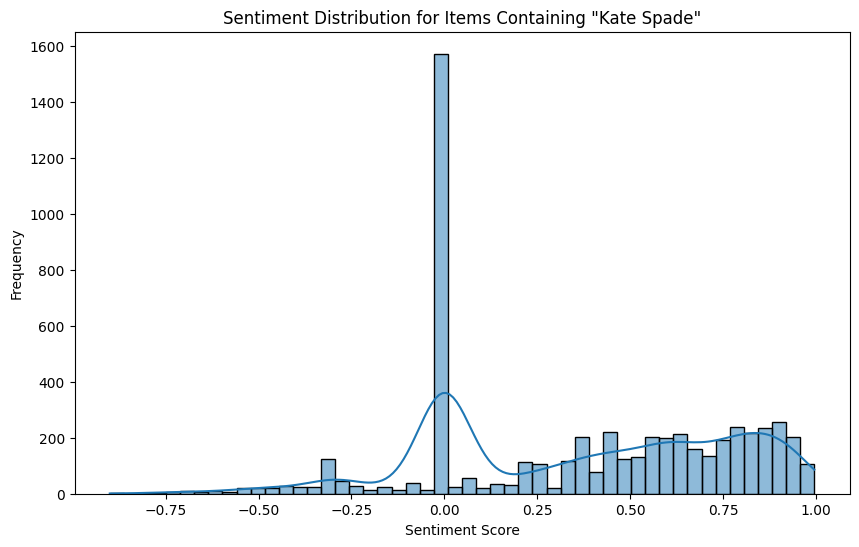

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


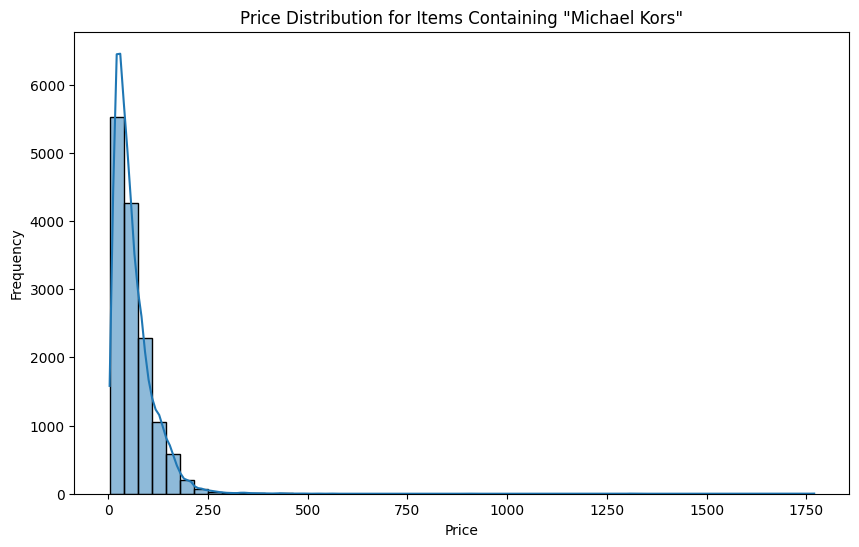

Correlation between price and items containing "Michael Kors": 0.0891
Correlation between item_condition_id and items containing "Michael Kors": 0.0268


/tmp/ipykernel_33/3218903306.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Average sentiment score for items containing "Michael Kors": 0.3450


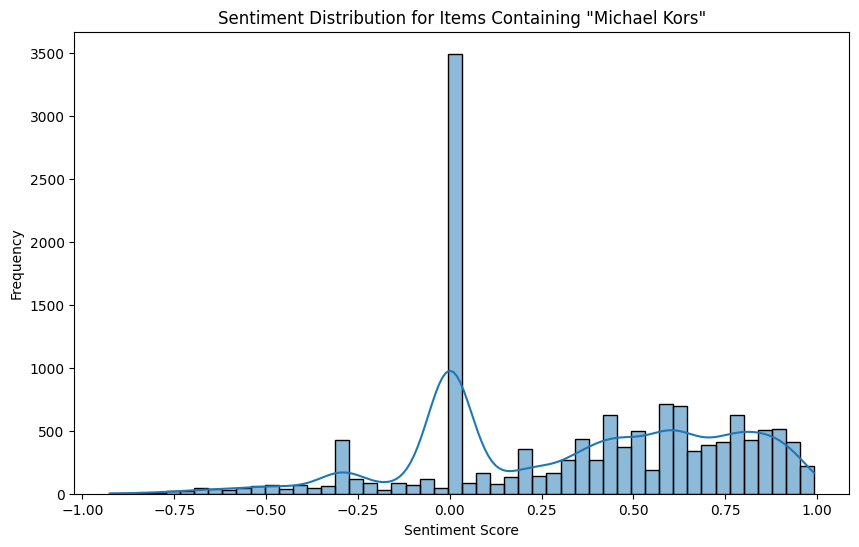

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


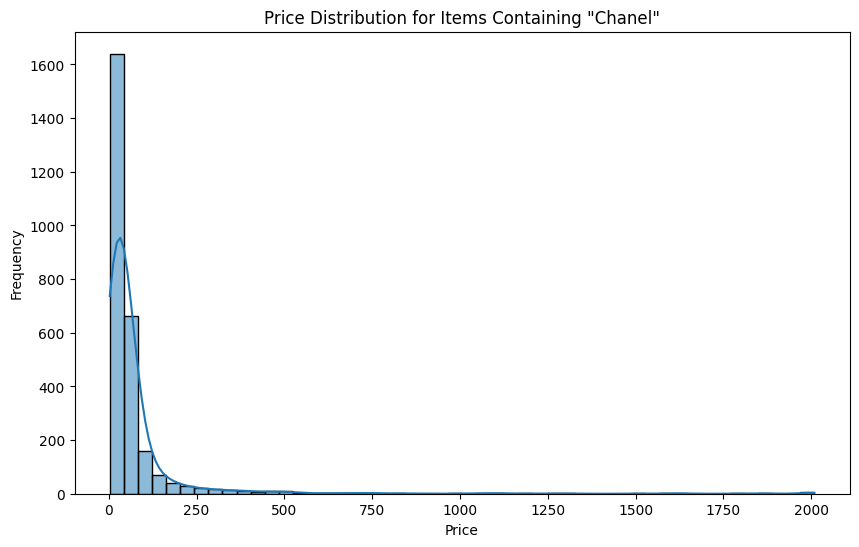

Correlation between price and items containing "Chanel": 0.0488
Correlation between item_condition_id and items containing "Chanel": -0.0036


/tmp/ipykernel_33/3218903306.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Average sentiment score for items containing "Chanel": 0.3132


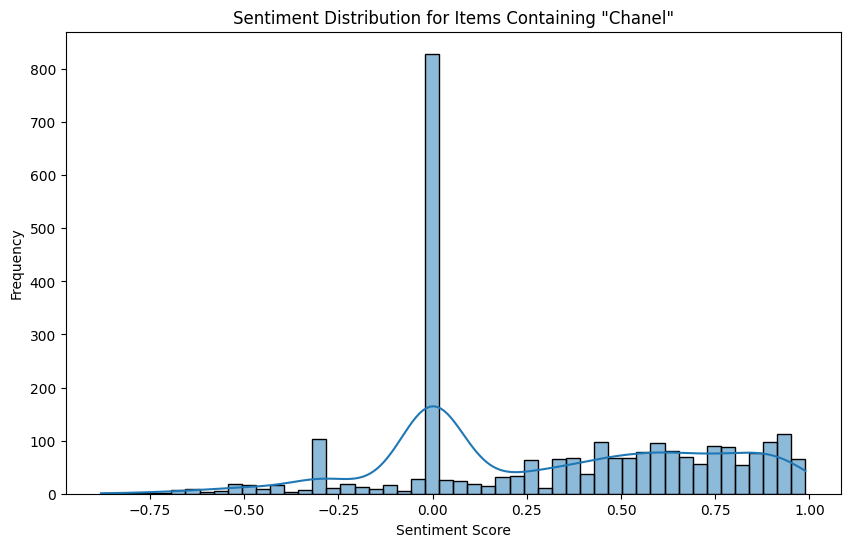

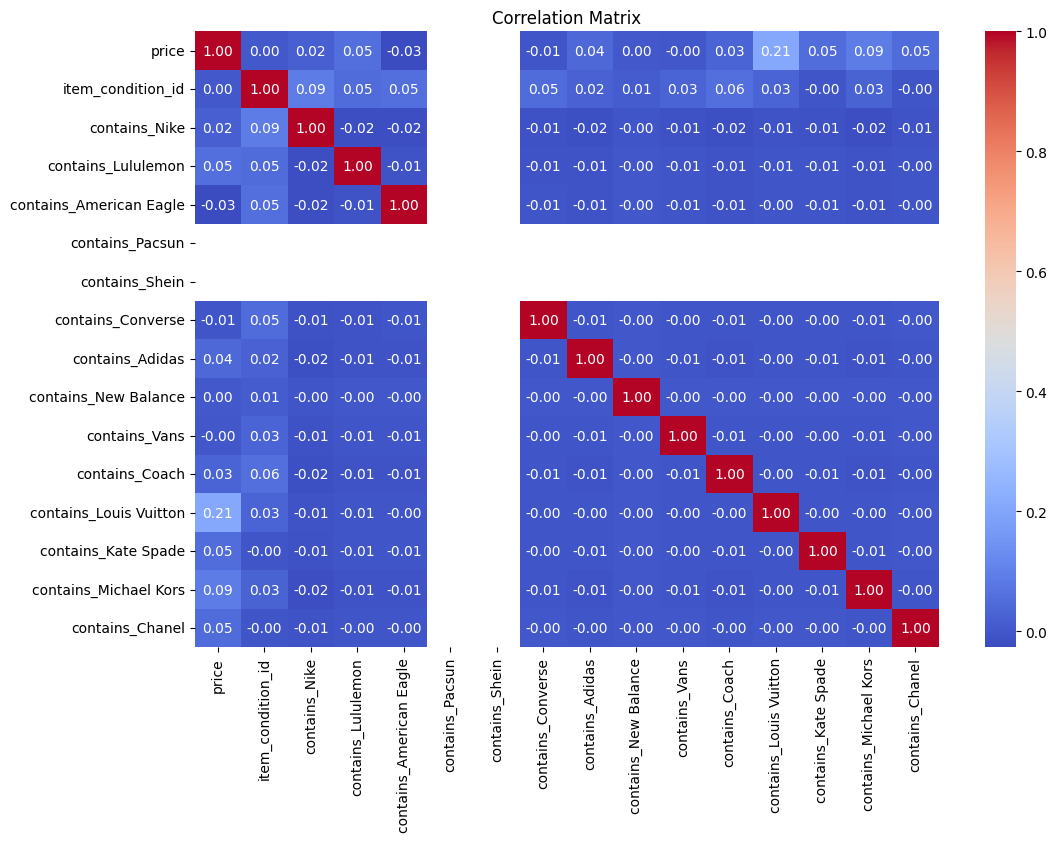

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

# 브랜드 리스트 정의
brands = ["Nike", "Lululemon", "American Eagle", "Pacsun", "Shein", 
          "Converse", "Adidas", "New Balance", "Vans", "Coach", 
          "Louis Vuitton", "Kate Spade", "Michael Kors", "Chanel"]

# 데이터프레임 필터링 함수
def filter_by_brand(df, brands):
    brand_pattern = '|'.join(brands)
    return df[df['brand_name'].str.contains(brand_pattern, case=False, na=False)]

# 특정 브랜드 포함 여부를 나타내는 열 추가
def add_brand_flag(df, brand):
    df[f'contains_{brand}'] = df['brand_name'].str.contains(brand, case=False, na=False).astype(int)

# 특정 브랜드 포함 여부에 따른 가격 분포 시각화
def plot_price_distribution(df, brand):
    filtered_df = filter_by_brand(df, [brand])
    plt.figure(figsize=(10, 6))
    sns.histplot(filtered_df['price'], bins=50, kde=True)
    plt.title(f'Price Distribution for Items Containing "{brand}"')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

# 특정 브랜드 포함 여부와 가격 상관관계 계산
def calculate_brand_price_correlation(df, brand):
    add_brand_flag(df, brand)
    correlation = df[f'contains_{brand}'].corr(df['price'])
    print(f'Correlation between price and items containing "{brand}": {correlation:.4f}')

# 특정 브랜드 포함 여부와 item_condition_id 상관관계 계산
def calculate_brand_condition_correlation(df, brand):
    add_brand_flag(df, brand)
    correlation = df[f'contains_{brand}'].corr(df['item_condition_id'])
    print(f'Correlation between item_condition_id and items containing "{brand}": {correlation:.4f}')

# 감정 분석 함수
def sentiment_analysis(df, brand):
    sia = SentimentIntensityAnalyzer()
    filtered_df = filter_by_brand(df, [brand])
    filtered_df['sentiment'] = filtered_df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])
    avg_sentiment = filtered_df['sentiment'].mean()
    print(f'Average sentiment score for items containing "{brand}": {avg_sentiment:.4f}')
    plt.figure(figsize=(10, 6))
    sns.histplot(filtered_df['sentiment'], bins=50, kde=True)
    plt.title(f'Sentiment Distribution for Items Containing "{brand}"')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

# 브랜드 빈도수 계산 및 시각화
def calculate_brand_frequencies(df, brands):
    brand_counts = {}
    total_count = len(df)
    
    for brand in brands:
        brand_counts[brand] = df['brand_name'].str.contains(brand, case=False, na=False).sum()

    brand_frequencies = {brand: count / total_count * 100 for brand, count in brand_counts.items()}
    
    # 시각화
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(brand_frequencies.keys()), y=list(brand_frequencies.values()))
    plt.title('Brand Frequency Percentage')
    plt.xlabel('Brand')
    plt.ylabel('Frequency Percentage')
    plt.xticks(rotation=45)
    plt.show()
    
    return brand_frequencies

# 데이터프레임 로드
# train_df = pd.read_csv('train.tsv', sep='\t') # 이미 로드되었다고 가정

# 브랜드 리스트
brands = ["Nike", "Lululemon", "American Eagle", "Pacsun", "Shein", 
          "Converse", "Adidas", "New Balance", "Vans", "Coach", 
          "Louis Vuitton", "Kate Spade", "Michael Kors", "Chanel"]

# 브랜드 빈도수 계산 및 시각화
brand_frequencies = calculate_brand_frequencies(train_df, brands)
print("Brand Frequencies (Percentage):")
for brand, freq in brand_frequencies.items():
    print(f"{brand}: {freq:.2f}%")

# 브랜드별 분석
for brand in brands:
    plot_price_distribution(train_df, brand)
    calculate_brand_price_correlation(train_df, brand)
    calculate_brand_condition_correlation(train_df, brand)
    sentiment_analysis(train_df, brand)

# 상관관계 히트맵 시각화
correlation_matrix = train_df[['price', 'item_condition_id'] + [f'contains_{brand}' for brand in brands]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
